# Unit-5-HW: Finding the Centroid in Shakespeare's Plays

This assignment was borrowed from Dr. Paul's section on Exploring Machine Learning. I think it presents a unique showcase on how k means can be used to categorize data. A lot of the setup is done for you in this notebook to give you a feel of what it might look like for your project.

There are no pytest cases for this homework since it was borrowed from Dr. Paul. Please see the rubric at the bottom of the file for grading. I have also left this notebook a bit more open than usual, if you have questions about grading please let me know. Please push this notebook to your github repo like any other assignment. 


Citations:

This notebook is based on John Lad's exploration which I encourage you to explore and take inspiration: https://jrladd.com/statistical_modeling

**Data:** [Shakespeare's plays](https://drive.google.com/drive/folders/1FOAnnR5ekwJsWLXsSVa_5fHOnShLLGc1?usp=sharing)

Data Source: [Text files provided by the Folger Shakespeare Library](https://www.folger.edu/explore/shakespeares-works/download/#titus-andronicus) (Washington D.C.).


# The Problem

Shakespeare and data go together, believe it or not. The field of bibliography is the collecting of data on books, and people have been doing it for Shakespeare's plays and poems for centuries.

One of the major questions we have about each of Shakespeare's plays is this: are they Comedy, History, Tragedy, Romance, and Tragicomedy? You'll use data to explore a group of the plays you choose, or all 37 of them!

Specifically, we will use the unsupervised learning method, K-means clustering, to categorize Shakespeare's plays into groups.  

# Getting Started

First, you will have to turn Shakespeare's plays into numbers! Surprisingly, we now know that we can classify texts by knowing just the 100 most commonly occuring words. So, for this small project, you will begin by using a method called Term Frequency - Inverse Document Frequency (tf-idf) to **count the words** in Shakespeare's plays.

[Here](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf) is a description of an application of the Tf-idf method, and [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) is its documentation on the Tf-idf method. Since we did not go over this method in class, and because we are moving away from the more guided worksheets, I am giving you most time in the assignment to learn about the method. Importantly, **Tf-idf measures how relevant a word is in a series of words by determining how much information it provides**.  

# Implement the Tf-idf Solution

The celles of code, below, are written by a fellow scholar of early modern literature, John Ladd. We are going to study his approach, however, you are welcome to find a new approach, as you are also welcome to use data for clustering other than Shakespeare's plays for your completion of this assignment. The questions at the end of the notebook ask you to evaluate Ladd's model.

In [2]:
import requests, re, zipfile, io
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Empty lists for titles and texts

In [3]:
titles = [] #use as row labels
texts = [] #the data we will analyze

shakeszip = requests.get("https://jrladd.com/CIS241/data/shakespeare.zip") #we will use John Ladd's zip file for this part of the activity.
#However, the data is drawn from the Folger Shakespeare Library's website, which the first cell in this notebook links to.

# Unzip the Folder, Get All the Files Out, and Save the Play Titles

In [4]:
#path_to_file = ""
#df = pd.read_csv(path_to_file)

with zipfile.ZipFile(io.BytesIO(shakeszip.content)) as myzip: # Look inside our zipfile
    for i in myzip.infolist(): # Loop through each file
        if i.is_dir() == False and i.filename.startswith('__MACOSX') == False: # Filter out the pointless duplicates
            titles.append(re.split(r"/|_TXT",i.filename)[1]) # Add titles to list
            texts.append(myzip.read(i.filename)) # Add the text to list

# Create a Vectorizer Instance for 100 words

In [5]:
vectorizer = TfidfVectorizer(max_features=100)

# Transform Files into Tf-idf

In [6]:
shakespeare = vectorizer.fit_transform(texts)

# Turn vectorizer results into readable dataframe

In [7]:
shakespeare = pd.DataFrame(shakespeare.toarray(), index=titles, columns=vectorizer.get_feature_names_out())
shakespeare

,all,am,an,and,are,as,at,be,but,by,...,where,which,who,why,will,with,would,yet,you,your
much-ado-about-nothing,0.054234,0.046922,0.052406,0.396703,0.056063,0.087141,0.034125,0.110297,0.106031,0.060938,...,0.007313,0.034125,0.019500,0.029859,0.120047,0.125531,0.053625,0.020719,0.303469,0.111516
richard-iii,0.064522,0.025982,0.012991,0.403587,0.041138,0.059759,0.042437,0.095700,0.084009,0.073183,...,0.020786,0.033344,0.026848,0.019920,0.070151,0.119084,0.027281,0.020353,0.169749,0.118651
the-winters-tale,0.054603,0.037802,0.027826,0.350719,0.057753,0.121807,0.031502,0.132307,0.117606,0.067729,...,0.014701,0.063528,0.022051,0.014176,0.060378,0.109206,0.040952,0.026776,0.247813,0.138082
richard-ii,0.061009,0.024290,0.020901,0.415197,0.048016,0.080215,0.035588,0.094337,0.084734,0.053665,...,0.021466,0.040108,0.018642,0.016382,0.054795,0.145743,0.025420,0.028245,0.091513,0.071177
henry-vi-part-3,0.060131,0.023441,0.019364,0.483085,0.037709,0.074399,0.042805,0.105993,0.100388,0.056054,...,0.022931,0.019874,0.014778,0.036180,0.070322,0.141155,0.024460,0.025989,0.102936,0.072870
the-two-noble-kinsmen,0.080347,0.043826,0.024160,0.472531,0.078100,0.088213,0.037083,0.116307,0.096079,0.057872,...,0.029779,0.037083,0.019104,0.020227,0.065177,0.111250,0.047197,0.041016,0.247784,0.103946
timon-of-athens,0.097536,0.030527,0.030527,0.400568,0.064031,0.062542,0.037972,0.096047,0.102003,0.047651,...,0.014146,0.035738,0.023826,0.023826,0.048396,0.127318,0.040206,0.023081,0.214430,0.099770
the-merchant-of-venice,0.050456,0.044589,0.032268,0.361405,0.059256,0.111472,0.036962,0.109712,0.106779,0.062190,...,0.016427,0.035788,0.027575,0.023468,0.077444,0.114406,0.042242,0.020534,0.265187,0.102672
loves-labors-lost,0.054099,0.033061,0.042077,0.349241,0.060711,0.093772,0.039673,0.084756,0.095575,0.073335,...,0.019235,0.040875,0.015028,0.022241,0.106395,0.100985,0.031858,0.010820,0.204375,0.096778
troilus-and-cressida,0.075956,0.018612,0.037727,0.412981,0.053320,0.122737,0.043260,0.098592,0.103119,0.055332,...,0.019618,0.021630,0.024648,0.031690,0.076459,0.115192,0.038230,0.023642,0.228875,0.064387


You just created data. These are normalized counts of the most frequent 100 words in Shakespeare's plays.

In this penultimate step, do these things:

1.   Choose a number of clusters you think you will need, and explain why you chose that number for the value of K. For a model, I have made available the notebook we went over in class when we first discussed the method (Remember, this notebook erroneously uses the K-means method on lableled data).  

Your answer here

2.   Use K-means clustering to classify instances in the Shakespeare data. Do your results match the general way that the Folger Shakespeare Library and literary scholars describe and classify each play? Click on each play, [here](https://www.folger.edu/explore/shakespeares-works/all-works/), for that information.

Your answer here


1.   Bonus: Create a visualization of your clustering model. Which features seem to be separating the clusters? Suggest 1-2 next steps.

Your answer here

c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:14

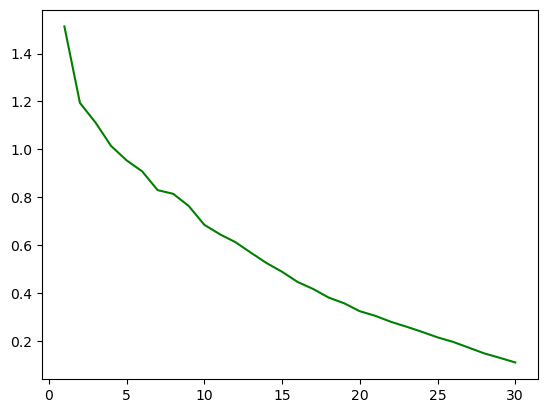

c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\legoe\miniconda3\envs\RL-DT-ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Inertia: 0.9540020463324588
These should match if our classification is correct:
Romeo and Juliet: [4]
Othello: [4]
And they do!
These should not match:
Coriolanus: [0]
Twelfth Night [4]
However, Twelfth night is a comedy that doesn't matches the tragedies. Clearly the model isn't perfect.
Reducing the components reduces the overall error substantially:
Inertia: 0.8104784897221186
These should match:
Romeo and Juliet: [4]
Othello: [4]
Is Twelfth Night (Comedy) distinct from Romeo and Juliet and Othello?
Twelfth Night: [4]
No, PCA was not able to fix this discrepancy.


In [50]:
# Extra Imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Firstly, lets clean the data because I notice a row that is not supposed to be there, the .ipynb_checkpoints
df = shakespeare.drop(".ipynb_checkpoints")

# Creating the X 
X = np.array(df, dtype=np.float64)

# Making the model, standard parameters for now
# Using n_clusters=5 because of the 5 types of plays: Comedy, History, Tragedy, Romance, and Tragicomedy
model = KMeans(n_clusters=5, random_state=42)

# Training the model
os.environ["OMP_NUM_THREADS"] = "1"  # Line to fix memory leak warning
model.fit(X)

inertia = np.array([])
n_clusters = np.arange(1, 31)

for i in n_clusters:
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    inertia = np.append(inertia, model.inertia_)

# Plotting inertia vs n_clusters
plt.plot(n_clusters, inertia, color="green")
plt.show()

"""
Both Romeo and Juliet and Othello are classfied as tragedies according to Folgers Shakespear
Thus, they should be in the same genre cluster
"""

model = KMeans(n_clusters=5, random_state=42)
model.fit(X)
print("Inertia:", model.inertia_)
print("These should match if our classification is correct:")
print("Romeo and Juliet:", model.predict(np.array([df.loc["romeo-and-juliet"]])))
print("Othello:", model.predict(np.array([df.loc["othello"]])))
print("And they do!")

print("These should not match:")
print("Coriolanus:", model.predict(np.array([df.loc["coriolanus"]])))
print("Twelfth Night", model.predict(np.array([df.loc["twelfth-night"]])))
print("However, Twelfth night is a comedy that doesn't matches the tragedies. Clearly the model isn't perfect.")


"""
Implementing PCA to reduce the dimensionality of the words
"""
pca = PCA(n_components=15)
X = pca.fit_transform(X)
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

print("Reducing the components reduces the overall error substantially:")
print("Inertia:", model.inertia_)

# These are the necessary indices, we need to use the transformed data to predict
print("These should match:")
print("Romeo and Juliet:", model.predict([X[28]]))
print("Othello:", model.predict([X[27]]))

print("Is Twelfth Night (Comedy) distinct from Romeo and Juliet and Othello?")
print("Twelfth Night:", model.predict([X[33]]))
print("No, PCA was not able to fix this discrepancy.")


# Questions

In addition to the questions, above, list your answer to this question:  

1. If the common words list does not seem to tell us much about genre, what methods can you find online for extracting unimportant words from the text files. What is that method?

2. Bonus: Implement one method you found above in the block below. Did it improve your results?

3. How might K-means clustering help you to solve a timeless or new problem in your field, or a field besides literary studies?



In [ ]:
"""
1. If we wanted to eliminate unimportant information from the words to reduce the amount of noise or limit the training time, we could use a technique like
Principle Component Analysis to extract the most important words from the dataset and throw away words that are more uniform across plays.
2. I implemented the PCA method in the above cell before training the model. I decreased from 100 parameters to 15 and found that it decreased the inertia 
but had a limited effect on the accuracy of the classifications. It is possible that if I tested more plays, I would find that it improved the results, but it
yielded similar results for the few plays I considered.
3. I am particularly interested in automation, and automated quality control for manufactured products is a huge part of building an automated assembly line. 
K-Means and PCA could be used to cluster images of parts, adjust for rotation, and find parts that were outliers in a product line. While it is unlikely that 
K-Means would be the core machine learning algorithm used in such a system, it could be an important of the image preprocessing and encoding stage, for instance
to align part images to a central rotation for another neural network to detect failures or defects.
""" 

# Rubric

| Criteria | Failing                                    | Passing                                                                                                | Reaching Full Credit                                               |
|----------|--------------------------------------------|--------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------|
|     Completing Notebook     | No attempt at notebook or creating a model | Attempt at notebook and creating a model and all non-bonus questions answered | Meet Passing Criteria with all bonus questions and tasks answered. |

If any criteria are “Failing” |  50% Maximum
All criteria “Passing” | 70%
For each “Reaching Full Credit” criteria met | + 30%

Maximum Score: 100%

Note that a lack of quality of questions answered may result in a reduced score.
